In [1]:
# import necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data set
df=pd.read_csv("D:/Datatrained projects/data/abalone.csv")
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
631,F,0.430,0.34,0.120,0.391,0.1555,0.0950,0.1405,7
1624,M,0.565,0.44,0.125,0.802,0.3595,0.1825,0.2150,9
1233,I,0.370,0.28,0.085,0.217,0.1095,0.0350,0.0620,6
2456,I,0.250,0.18,0.060,0.073,0.0280,0.0170,0.0225,5
2070,I,0.550,0.42,0.115,0.668,0.2925,0.1370,0.2090,11


In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# check the data dimension
df.shape

(4177, 9)

In [5]:
# statistical summary of dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
# check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
# checking total sum of null values
df.isnull().sum().sum()

0

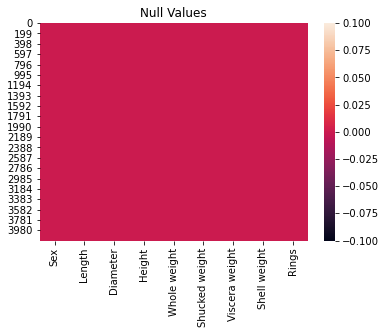

In [8]:
# plotting heatmap of null values to check null values
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# from above analysis it is clear that no null values are present in dataset.

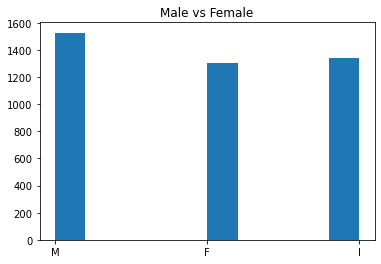

In [9]:
# checking for imbalance in dataset
df['Sex'].hist(grid=False)
plt.title('Male vs Female')
plt.show()

In [10]:
# count of classification data
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
# using encoding techniques to convert classification data to nominal
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df["Sex"])
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [12]:
# checking value assigned in encoding
LE.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [13]:
# checking correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


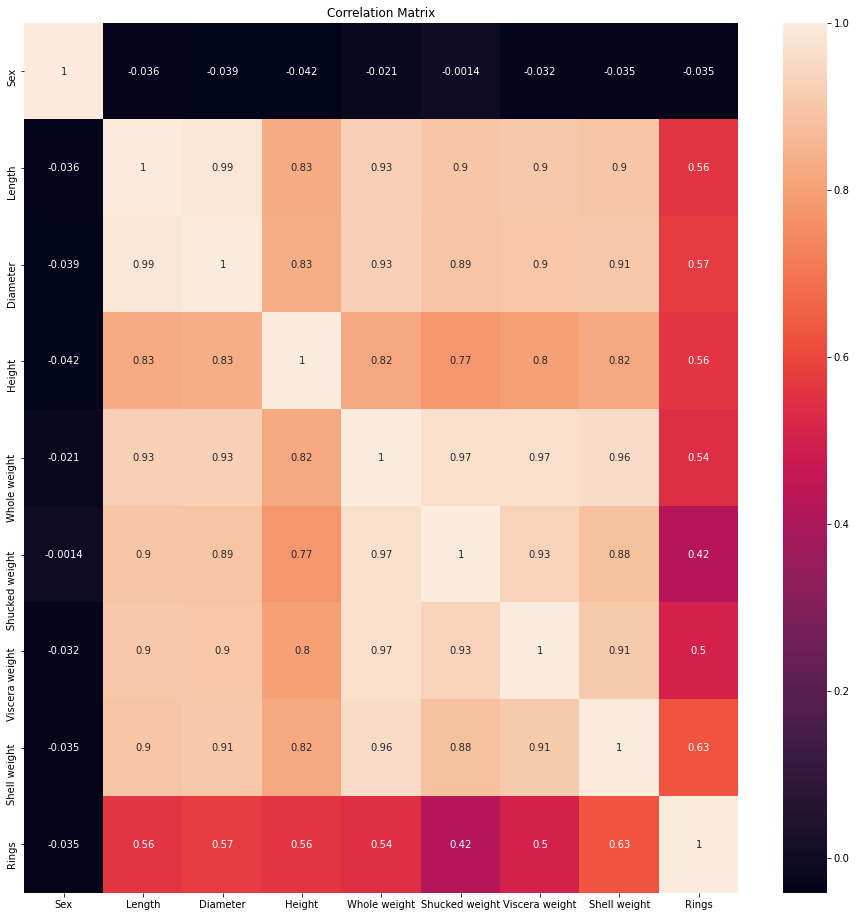

In [14]:
# plotting heatmap of correlation
corr_mat=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

 from above heatmap we can see that there is a strong relationship between all features with label

In [15]:
# printing correlation values of independant variable with target variable in sorted form
corr_matrix=df.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.001373
Whole weight     -0.021391
Viscera weight   -0.032067
Rings            -0.034627
Shell weight     -0.034854
Length           -0.036066
Diameter         -0.038874
Height           -0.042077
Name: Sex, dtype: float64

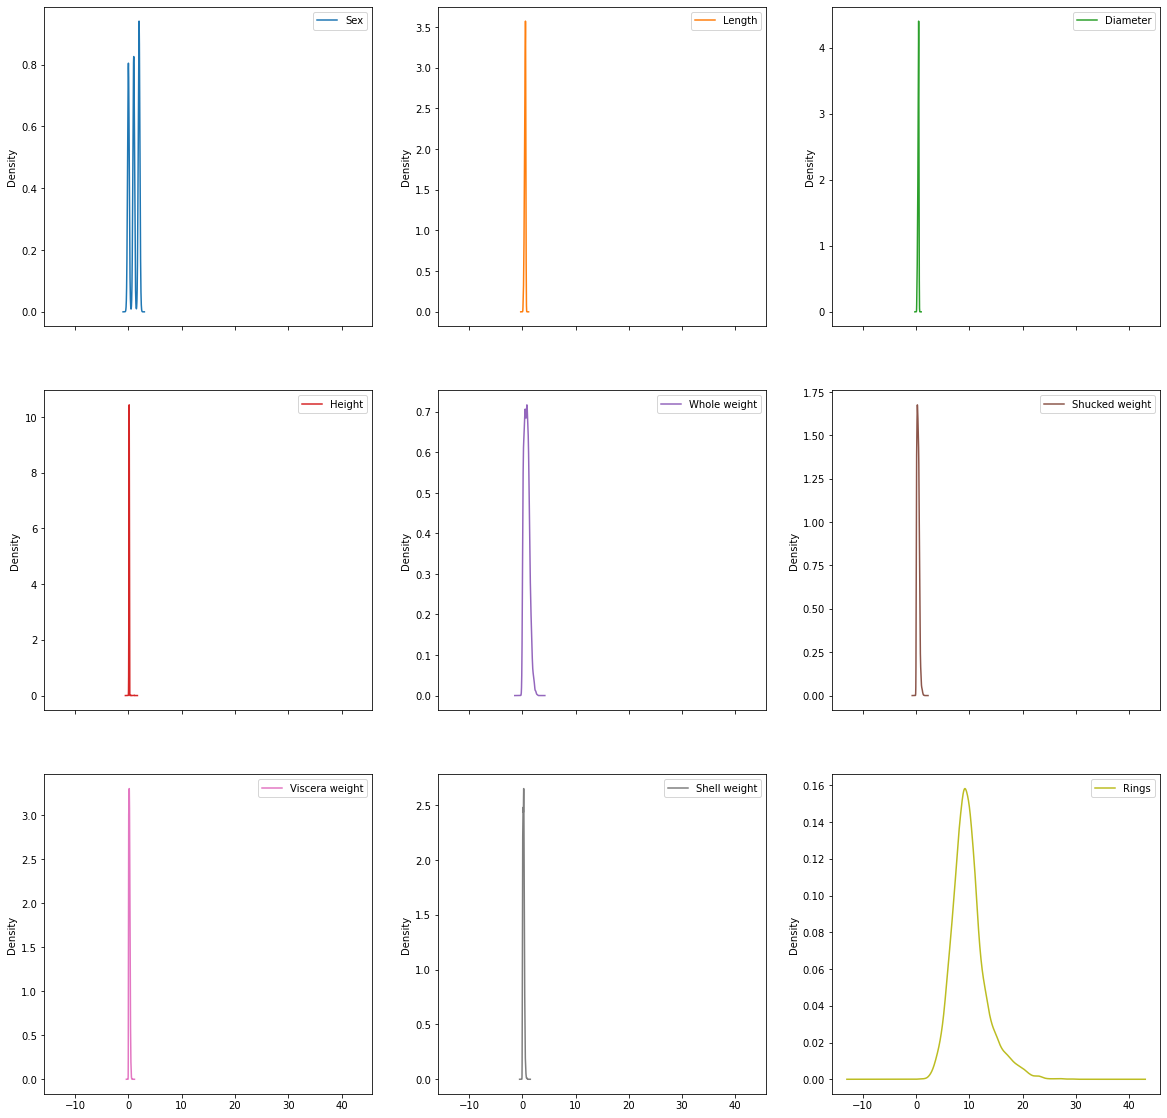

In [16]:
# data distribution 
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,20))
plt.show()

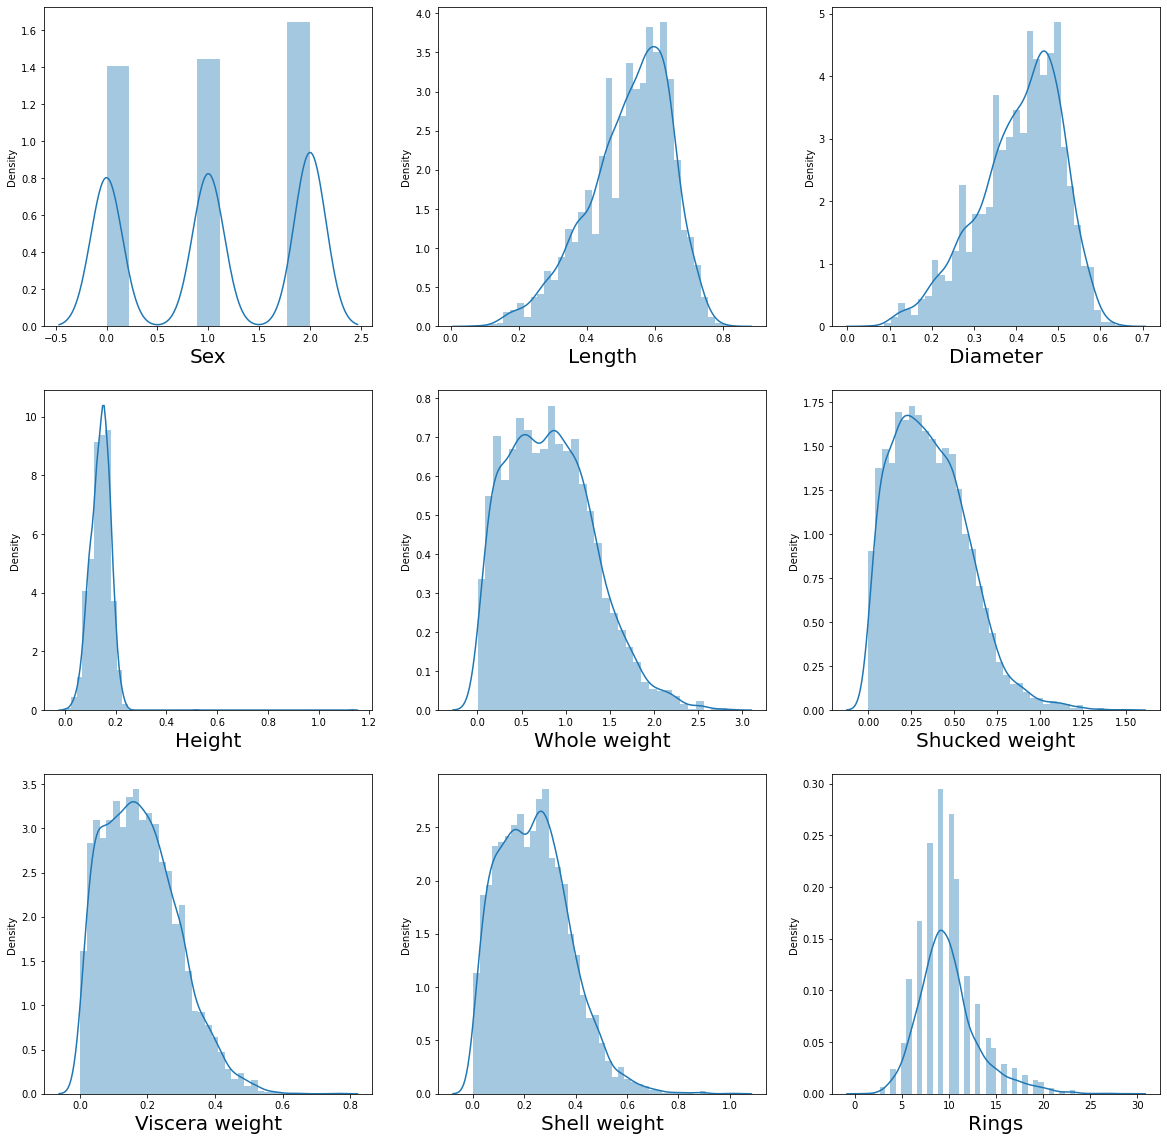

In [17]:
# data distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout
plt.show()

# from above distribution we can see there is a skewness in dataset

In [18]:
# split the data into features and label
x=df.drop(['Rings','Sex'],axis=1)
y=df["Rings"]

In [19]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [20]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [21]:
# checking skewness
x.skew().sort_values()      # we can see the skewness in dataset

Length           -0.639873
Diameter         -0.609198
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Height            3.128817
dtype: float64

In [22]:
x.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [23]:
# using the power transform function to remove skewness
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [24]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [25]:
# validating skewness removed or not
x.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
dtype: float64

In [26]:
sk=x.skew()
sk

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [27]:
sk[np.abs(sk)>0.5].all()  # checking skewness is in range (-0.5to 0.5)or not

True

from above we can say that skewness is removed

# checking outliers

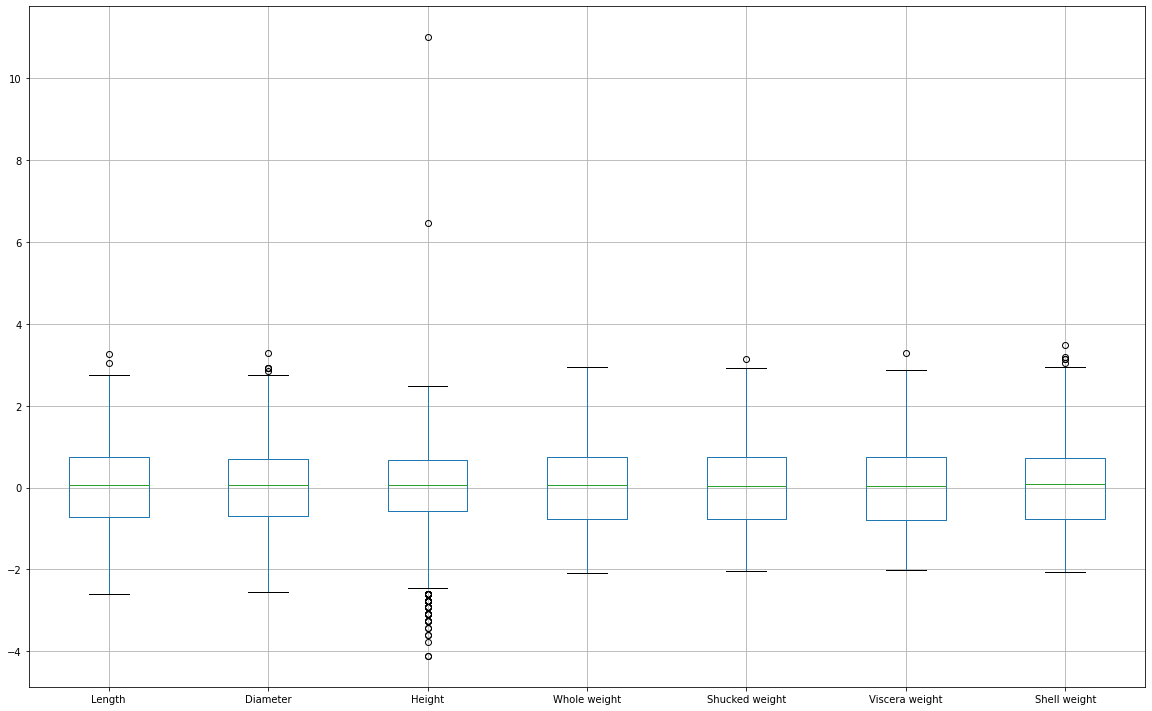

In [28]:
# plotting box plot
x.boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [29]:
# quantify the outliers
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [30]:
# it is clear that outliers are present and are above the range std.

In [31]:
# removing outliers with zscore
from scipy import stats
import numpy as np
 # for column length
z = np.abs(stats.zscore(df['Length']))
print(z)

[0.57455813 1.44898585 0.05003309 ... 0.6329849  0.84118198 1.54905203]


In [32]:
index=np.where(z>3)
index

(array([ 236,  237,  238,  239,  526,  696,  719,  720, 1429, 1986, 1987,
        2114, 2381, 3899, 3902], dtype=int64),)

In [33]:
df=df.drop(df.index[index])
df.shape

(4162, 9)

In [34]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4157,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4158,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4159,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4160,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [35]:
# zscore for diameter
z = np.abs(stats.zscore(df['Diameter']))
print(z)

[0.4500254  1.47341395 0.1128383  ... 0.675702   0.77804086 1.49441284]


In [36]:
index=np.where(z>3)
index

(array([ 689, 2157, 3824], dtype=int64),)

In [37]:
df=df.drop(df.index[index])
df.shape

(4159, 9)

In [38]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4154,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4155,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4156,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4157,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
# zscore for diameter
z = np.abs(stats.zscore(df['Height']))
print(z)

[1.09008351 1.21122332 0.12096505 ... 1.57499227 0.24245438 1.33271265]


In [40]:
# getting indexex
index=np.where(z>3)
index

(array([1165, 1248, 1408, 2039, 3978], dtype=int64),)

In [41]:
# dropping indexes
df=df.drop(df.index[index])
df.shape

(4154, 9)

In [42]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4149,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4150,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4151,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4152,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
# zscore for shucked weight
z = np.abs(stats.zscore(df['Shucked weight']))
# getting indexex
index=np.where(z>3)
# dropping indexes
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4113,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4114,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4115,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4116,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
# zscore for Viscera weightt
z = np.abs(stats.zscore(df['Viscera weight']))
# getting indexex
index=np.where(z>3)
# dropping indexes
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4101,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4102,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4103,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4104,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
# zscore for Shell weight
z = np.abs(stats.zscore(df['Shell weight']))
# getting indexex
index=np.where(z>3)
# dropping indexes
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4074,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4075,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4076,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4077,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [46]:
# we have removed all the outliers 

In [52]:
# import necessary liabraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [67]:
# creatinng train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=123)

In [68]:
# instatiating linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
# saving the model
import pickle
filename="abalone_project.pickle"
pickle.dump(lr,open(filename,'wb'))

In [70]:
# checking how well model learned
lr.score(x_train,y_train)

0.5545122480610756

In [71]:
# prediction on test data
predlr=lr.predict(x_test)
predlr

array([ 5.73177033,  8.90091915,  8.02040826, ...,  6.37680489,
       10.95858374, 20.72730465])

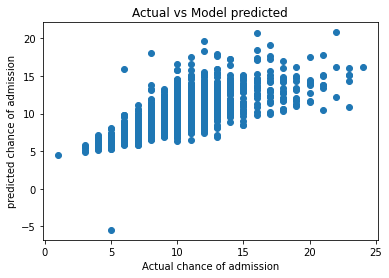

In [72]:
# plot and visualize
plt.scatter(y_test,predlr)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title("Actual vs Model predicted")
plt.show()

In [73]:
# model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predlr)
mean_squared_error(y_test,predlr)
np.sqrt(mean_squared_error(y_test,predlr))

2.1819294176348234

In [77]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt)*100)
print(classification_report(y_test,preddt))

19.748653500897667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.11      0.20      0.14         5
           4       0.26      0.19      0.22        26
           5       0.27      0.22      0.24        54
           6       0.24      0.25      0.25       108
           7       0.23      0.27      0.25       150
           8       0.27      0.25      0.26       242
           9       0.25      0.27      0.26       264
          10       0.22      0.19      0.20       254
          11       0.20      0.17      0.18       203
          12       0.07      0.08      0.07        99
          13       0.11      0.14      0.12        80
          14       0.06      0.06      0.06        47
          15       0.17      0.12      0.14        40
          16       0.09      0.12      0.10        26
          17       0.04      0.06      0.05        18
          18       0.00      0.00      0.00        18
        

In [79]:
# Random foret classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=dt.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(classification_report(y_test,predrf))

19.748653500897667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.11      0.20      0.14         5
           4       0.26      0.19      0.22        26
           5       0.27      0.22      0.24        54
           6       0.24      0.25      0.25       108
           7       0.23      0.27      0.25       150
           8       0.27      0.25      0.26       242
           9       0.25      0.27      0.26       264
          10       0.22      0.19      0.20       254
          11       0.20      0.17      0.18       203
          12       0.07      0.08      0.07        99
          13       0.11      0.14      0.12        80
          14       0.06      0.06      0.06        47
          15       0.17      0.12      0.14        40
          16       0.09      0.12      0.10        26
          17       0.04      0.06      0.05        18
          18       0.00      0.00      0.00        18
        

In [80]:
df["Rings"].value_counts()

9     685
10    624
8     566
11    471
7     391
6     258
12    252
13    198
14    119
5     113
15    102
16     62
17     53
4      48
18     39
19     32
20     24
21     13
3      10
23      8
22      6
26      1
24      1
25      1
27      1
29      1
Name: Rings, dtype: int64